In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df1 = pd.read_csv('Auto.csv', na_values='?').dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [51]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)
# k-fold CV
folds = 10
elements = len(df1.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()



for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df1.horsepower.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    xtrain, xtest, ytrain, ytest = train_test_split(X_poly, df1.mpg, train_size=0.7, random_state=7)
    Z[i,j] = cross_val_score(regr, xtrain, ytrain, cv=kf_10, scoring='neg_mean_squared_error').mean()

/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always c

/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/hhp468/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always c

In [53]:
Z

array([[-26.79319551, -26.79319551, -26.79319551, -26.79319551,
        -26.79319551, -26.79319551, -26.79319551, -26.79319551,
        -26.79319551, -26.79319551],
       [-21.13258337, -21.13258337, -21.13258337, -21.13258337,
        -21.13258337, -21.13258337, -21.13258337, -21.13258337,
        -21.13258337, -21.13258337],
       [-21.13070727, -21.13070727, -21.13070727, -21.13070727,
        -21.13070727, -21.13070727, -21.13070727, -21.13070727,
        -21.13070727, -21.13070727],
       [-21.20810351, -21.20810351, -21.20810351, -21.20810351,
        -21.20810351, -21.20810351, -21.20810351, -21.20810351,
        -21.20810351, -21.20810351],
       [-20.70781519, -20.70781519, -20.70781519, -20.70781519,
        -20.70781519, -20.70781519, -20.70781519, -20.70781519,
        -20.70781519, -20.70781519],
       [-20.23723972, -20.23723972, -20.23723972, -20.23723972,
        -20.23723972, -20.23723972, -20.23723972, -20.23723972,
        -20.23723972, -20.23723972],
       [-2

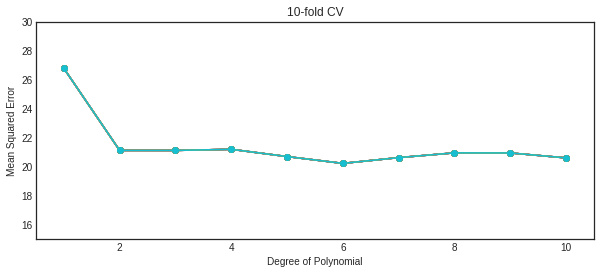

In [52]:
fig, (ax2) = plt.subplots(1,1, figsize=(10,4))

# Note: cross_val_score() method return negative values for the scores.
# https://github.com/scikit-learn/scikit-learn/issues/2439


# Right plot
ax2.plot(X,Z*-1,'-o')
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));